In [2]:
import math
import numpy as np

In [3]:
from qiskit_nature.second_q.hamiltonians.lattices import (
    BoundaryCondition,
    HyperCubicLattice,
    Lattice,
    LatticeDrawStyle,
    LineLattice,
    SquareLattice,
    TriangularLattice,
)

In [4]:
num_nodes = 3
boundary_condition = BoundaryCondition.OPEN
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

In [6]:
line_lattice.to_adjacency_matrix()
print(line_lattice)

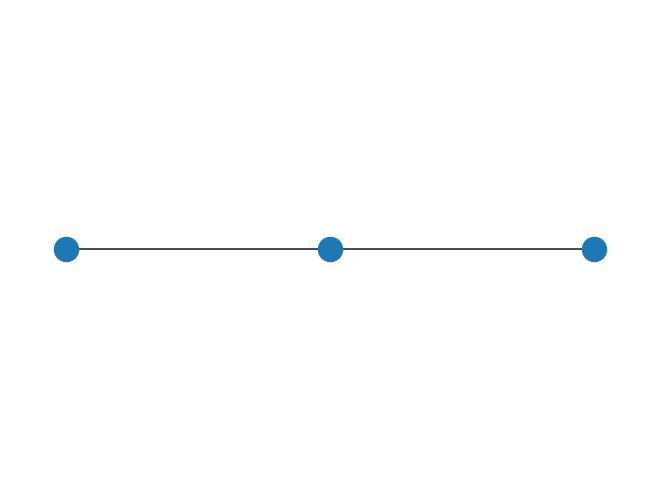

In [10]:
line_lattice.draw()

In [2]:
from qiskit.quantum_info import Pauli, Operator
from qiskit.quantum_info import SparsePauliOp

class BoseHubbardHamiltonian_2qubits:
    
    def __init__(self, n_sites, single_site_qubits, encoding, geometry):
        
        # n_sites (int) = number of sites in the lattice
        # single_site_qubits (int) = number of qubits used to describe each site
        # encoding (string) = type of qubit mapping 
        # geometry (LineLattice or another type of lattice) = how the sites are distributed in space and their connectivity 
              
        self.n_sites = n_sites
        self.ss_q = single_site_qubits
        self.n_qubits = self.n_sites * self.ss_q
        self.encoding = encoding
        self.geometry = geometry.to_adjacency_matrix() # the adjacency matrix gives informations about the sites' connectivity

        # Returns the bosonic creation, annihilation, and number operators acting on the system, which is mapped to qubits using the chosen encoding
        def second_quantization_ops(self):
                
            Y = Pauli('Y')
            X = Pauli('X')
            Z = Pauli('Z')
            I = Pauli('I')

            self.sigmaP = SparsePauliOp([X, Y], coeffs = [0.5, 0.5j])
            self.sigmaM = SparsePauliOp([X, Y], coeffs = [0.5, -0.5j])

            self.I_P = SparsePauliOp([I, Z], coeffs = [0.5, 0.5]) 
            self.I_M = SparsePauliOp([I, Z], coeffs = [0.5, -0.5])

            self.I_q = SparsePauliOp(['II'], coeffs = [1]) #identità su 2 qubit 
            self.I_3 = I_q^I_q^I_q  #identità su 6 qubit
        
            
            if self.encoding == "binary" and self.ss_q == 2:
         
                self.create = (self.I_P ^ self.sigmaM)+ math.sqrt(2)*(self.sigmaM ^ self.sigmaP) + math.sqrt(3)*(self.I_M ^ self.sigmaM) #sum of SparsePauliOps
                self.annihilate = self.create.adjoint()
                number = self.create.compose(self.annihilate).simplify()

        #construction of the total kinect energy operator based on the connectivity of the system: hypotesis of nearest neighbour hopping   
        def kinetic_energy_op(self): 

            self.Op = [I_q, I_q, I_q]
            self.kin=[]
            
            for i in range(self.n_sites): 
                for j in range(self.n_sites):
        
                    u = 2
                    while ( u >= 0 ):
                        if (u != i and u != j):
            
                            if i != j and self.geometry[i][j] != 0:
                                self.Op[i] = self.annihilate
                                self.Op[j] = self.create
                                self.Op[u] = self.I_q

                                self.kin.append(self.Op[i]^self.Op[j]^self.Op[u])
                        
                        u = u - 1

            self.Kinetic_op = sum(self.kin).simplify()
        
        #construction of the interaction term of the hamiltionian 
        def potential_energy_op(self):
                
            
            self.Op = [I_q, I_q, I_q]
            self.number_tot = []
            self.potent = []
           
            for i in range(M): 
                self.Op[i] = number
                self.number_tot.append((self.Op[0]^self.Op[1]^self.Op[2]))
                self.Op[i] = self.I_q
                    
            for i in range(M):
                self.potent.append(self.number_tot[i].compose(self.number_tot[i] - self.I_3))

            self.Potential_op = sum(self.potent).simplify()
    
              
        # Returns the qubit hamiltonian given the kinetic and potential coefficients.
        def get_H(self, J, U):
            self.U = U
            self.J = J
            H = J*self.Kinetic_op + U*self.Potential_op
            return H
        

In [6]:
#controllo

Y = Pauli('Y')
X = Pauli('X')
Z = Pauli('Z')
I = Pauli('I')

sigmaP = SparsePauliOp([X, Y], coeffs = [0.5, 0.5j])
sigmaM = SparsePauliOp([X, Y], coeffs = [0.5, -0.5j])

I_P = SparsePauliOp([I, Z], coeffs = [0.5, 0.5])
I_M = SparsePauliOp([I, Z], coeffs = [0.5, -0.5])

I_M_matrix_representation = I_M.to_matrix()
I_P_matrix_representation = I_P.to_matrix()

print(I_M_matrix_representation)
print("\n", I_P_matrix_representation)

[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [7]:
#controllo

create = (I_P^sigmaM)+ math.sqrt(2)*(sigmaM^sigmaP) + math.sqrt(3)*(I_M^sigmaM) 
#create = ((I_P^sigmaM).add( math.sqrt(2)*(sigmaM^sigmaP))).add( math.sqrt(3)*(I_M^sigmaM)) #errore add(): non è un metodo di SparsePauliOp (deprecated??)

#annihilate = SparsePauliOp.adjoint(create)
annihilate = create.adjoint()
number = SparsePauliOp.compose(create,annihilate).simplify()

create_rep = create.to_matrix()
print(create_rep)

print("\n", annihilate.to_matrix())

print("\n", number.to_matrix())


[[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.41421356+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 1.73205081+0.j 0.        +0.j]]

 [[0.        +0.j 1.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 1.41421356+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.73205081+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]]

 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 3.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [8]:
#controllo
geometry = line_lattice.to_adjacency_matrix()

#print(geometry)
#print(type(geometry))

struct = geometry.shape
M = struct[0]
N = struct[1]

Op = [I, I, I]

kin=[]
#construction of the total kinect energy operator
for i in range(M): 
    for j in range(N):
        
        u = 2
        while ( u >= 0 ):
            if (u != i and u != j):
            
                if i != j and geometry[i][j] != 0:
                    Op[i] = annihilate
                    Op[j] = create
                    Op[u] = I^I

                    kin.append(Op[i]^Op[j]^Op[u])
            u = u - 1

k = sum(kin).simplify()
print(k)
       

SparsePauliOp(['IXIXII', 'IXIYII', 'IXZXII', 'IXZYII', 'IXXXII', 'IXXYII', 'IXYXII', 'IXYYII', 'IYIXII', 'IYIYII', 'IYZXII', 'IYZYII', 'IYXXII', 'IYXYII', 'IYYXII', 'IYYYII', 'ZXIXII', 'ZXIYII', 'ZXZXII', 'ZXZYII', 'ZXXXII', 'ZXXYII', 'ZXYXII', 'ZXYYII', 'ZYIXII', 'ZYIYII', 'ZYZXII', 'ZYZYII', 'ZYXXII', 'ZYXYII', 'ZYYXII', 'ZYYYII', 'XXIXII', 'XXIYII', 'XXZXII', 'XXZYII', 'XXXXII', 'XXXYII', 'XXYXII', 'XXYYII', 'XYIXII', 'XYIYII', 'XYZXII', 'XYZYII', 'XYXXII', 'XYXYII', 'XYYXII', 'XYYYII', 'YXIXII', 'YXIYII', 'YXZXII', 'YXZYII', 'YXXXII', 'YXXYII', 'YXYXII', 'YXYYII', 'YYIXII', 'YYIYII', 'YYZXII', 'YYZYII', 'YYXXII', 'YYXYII', 'YYYXII', 'YYYYII'],
              coeffs=[ 1.8660254 +0.j        ,  0.        -1.8660254j , -0.5       +0.j        ,
  0.        +0.5j       ,  0.96592583+0.j        ,  0.        +0.96592583j,
  0.        -0.96592583j,  0.96592583+0.j        ,  0.        +1.8660254j ,
  1.8660254 +0.j        ,  0.        -0.5j       , -0.5       +0.j        ,
  0.        +0.9659

In [9]:
#controllo
geometry = line_lattice.to_adjacency_matrix()

struct = geometry.shape
M = struct[0]
N = struct[1]

I_q = SparsePauliOp(['II'], coeffs = [1]) #identità su 2 qubit    
I_3 = I_q^I_q^I_q
Op = [I_q, I_q, I_q]
number_tot = []
potent = []
           
for i in range(M): 
        Op[i] = number
       
        number_tot.append((Op[0]^Op[1]^Op[2]))
                    
        Op[i] = I_q
                    
for i in range(M):
        potent.append( number_tot[i].compose(number_tot[i] - I_3))

Potential_op = sum(potent).simplify()
print(Potential_op)

SparsePauliOp(['IIIIII', 'IZIIII', 'ZZIIII', 'ZIIIII', 'IIIZII', 'IIZZII', 'IIZIII', 'IIIIIZ', 'IIIIZZ', 'IIIIZI'],
              coeffs=[ 6.+0.j,  1.+0.j, -2.+0.j, -1.+0.j,  1.+0.j, -2.+0.j, -1.+0.j,  1.+0.j,
 -2.+0.j, -1.+0.j])
